In [574]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math

In [575]:
l = 2.271
g = 9.8
M = 2.925

In [576]:
m = pd.read_csv("data_1.csv")
m = m.head(4)
m["m"] = m["m"] / 1000
m["a"] = m["a"] / 1000

In [577]:
m

,m,a
0,0.000514,0.00975
1,0.000508,0.00950
2,0.000506,0.00900
3,0.000494,0.01025


In [578]:
m["v"] = math.sqrt(g / l) * ((m["m"] + M) / m["m"]) * m["a"]

In [579]:
def err(a, mean):
    return math.sqrt(sum([abs(mean - i) ** 2 for i in a]) / (len(a) * (len(a) - 1)))

In [580]:
for_r = pd.DataFrame()
for_r["x"] = m["m"].apply(lambda x: 1 / math.sqrt(x))
for_r["y"] = m["v"]
for_r["yerr"] = for_r["y"] * m["a"].apply(lambda x: 0.0005 / x)

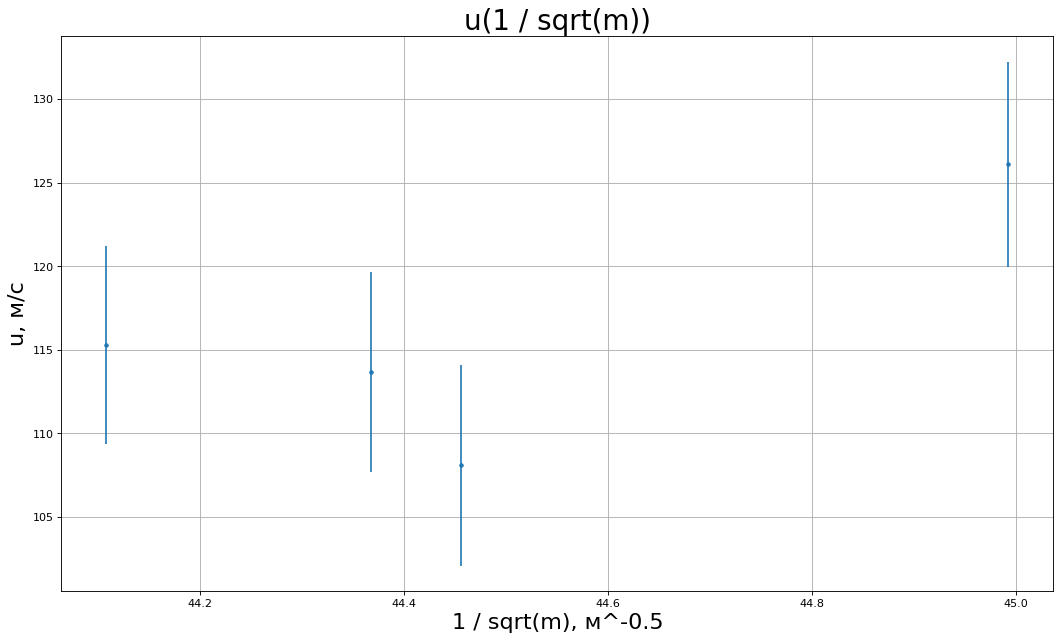

In [581]:
plt.figure(figsize=(16, 9), dpi=80)
plt.errorbar(x=for_r["x"], y=for_r["y"], yerr=for_r["yerr"], fmt='.')
plt.title(r"u(1 / sqrt(m))", fontsize=25)
plt.xlabel(r"1 / sqrt(m), м^-0.5", fontsize=20)
plt.ylabel(r"u, м/c", fontsize=20)
plt.grid(True)

In [582]:
def line(x, a, b):
    return a * x + b

params, cov = curve_fit(line, xdata= for_r["x"], ydata=for_r["y"], )

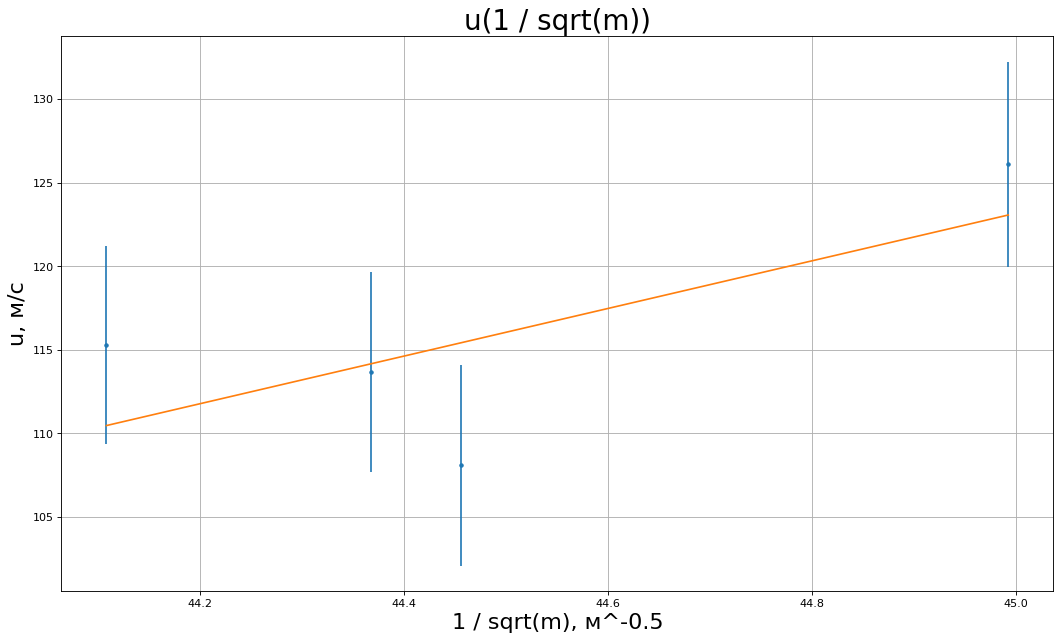

In [583]:
plt.figure(figsize=(16, 9), dpi=80)
plt.errorbar(x=for_r["x"], y=for_r["y"], yerr=for_r["yerr"], fmt='.')
plt.title(r"u(1 / sqrt(m))", fontsize=25)
plt.xlabel(r"1 / sqrt(m), м^-0.5", fontsize=20)
plt.ylabel(r"u, м/c", fontsize=20)
plt.grid(True)
plt.plot(for_r["x"], line(for_r["x"], params[0], params[1]), label="Истиная зависимость")

In [584]:
print(f"a = {params[0]:.3} \u00B1 {np.sqrt(cov[0][0]):.2}")
print(f"b = {params[1]:.3} \u00B1 {np.sqrt(cov[1][1]):.2}")

a = 14.3 ± 1e+01
b = -5.18e+02 ± 4.5e+02


In [585]:
m["v"].mean()

115.77905739527317

In [586]:
err(list(m["v"]), m["v"].mean())

3.767168097912453

In [587]:
T1 = 13.66
T2 = 17.99
M = 0.7140
R = 0.3345
r = 0.232

In [588]:
sqrtkT = 4 * math.pi * M * (R ** 2) * T1 / (T2 ** 2 - T1 ** 2)

In [589]:
sqrtkT

0.10006666101169696

In [590]:
d = pd.read_csv("data_1.csv")[4:]
d["m"] = d["m"] / 1000
d["a"] = d["a"] / 100
d["q"] = d["a"].apply(lambda x: abs(math.atan(x / 0.360)) / 2)
d["u"] = d["q"] * sqrtkT / d["m"] / r
d["uerr"] = d["u"] * math.sqrt((0.011) ** 2 + (0.001 / r) ** 2 + (0.000001 / 0.0005) ** 2 + (0.01 / 0.1) ** 2)

In [591]:
d

,m,a,q,u,uerr
4,0.000502,0.105,0.141897,121.918915,12.279105
5,0.000496,0.100,0.135473,117.807749,11.865047
6,0.000499,0.095,0.129004,111.507166,11.230482
7,0.000502,0.100,0.135473,116.399688,11.723234


In [592]:
(0.001 / r)

0.004310344827586207

In [593]:
for_r = pd.DataFrame()
for_r["x"] = d["m"].apply(lambda x: 1 / math.sqrt(x))
for_r["y"] = d["u"]

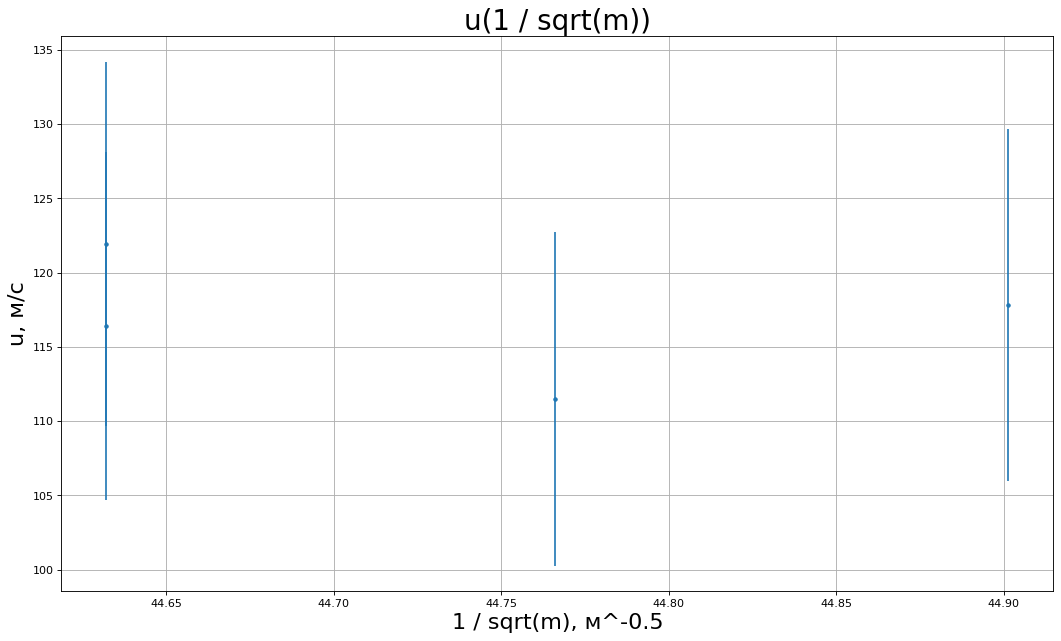

In [594]:
plt.figure(figsize=(16, 9), dpi=80)
plt.errorbar(x=for_r["x"], y=for_r["y"], yerr=d["uerr"], fmt='.')
plt.title(r"u(1 / sqrt(m))", fontsize=25)
plt.xlabel(r"1 / sqrt(m), м^-0.5", fontsize=20)
plt.ylabel(r"u, м/c", fontsize=20)
plt.grid(True)

In [595]:
d["u"].mean()

116.90837955541404

In [596]:
err(list(d["u"]), d["u"].mean())

2.1475994326348147